In [ ]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.metrics import confusion_matrix# confusion matrix to carry out error analysis
#import seaborn as sn                        # heatmap
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # best library ever

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Here's our 6 categories that we have to classify.
class_names = ['Toyota Innova', 'Tata Safari','Swift','Rolls Royce','Mahindra Scorpio','Hyundai Creta','Audi']
class_names_label = {'Toyota Innova': 0,
                    'Tata Safari' : 1,
                     'Swift':2,
                     'Rolls Royce':3,
                     'Mahindra Scorpio':4,
                     'Hyundai Creta':5,
                     'Audi':6



                    }
nb_classes = 7

In [ ]:
import tensorflow as tf
tf.__version__

'2.17.1'

In [ ]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """

    datasets = ['/content/drive/MyDrive/dl dataset/Cars Dataset/train','/content/drive/MyDrive/dl dataset/Cars Dataset/test']

    # Target size for both dimensions
    target_size = (64, 64)

    output = []
    for dataset in datasets:
        directory = "" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)

                # Resize the image to the target size
                curr_img = cv2.resize(curr_img, target_size)

                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!

        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [ ]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 3352
Number of testing examples: 813
Each image is of size: (64, 64, 3)


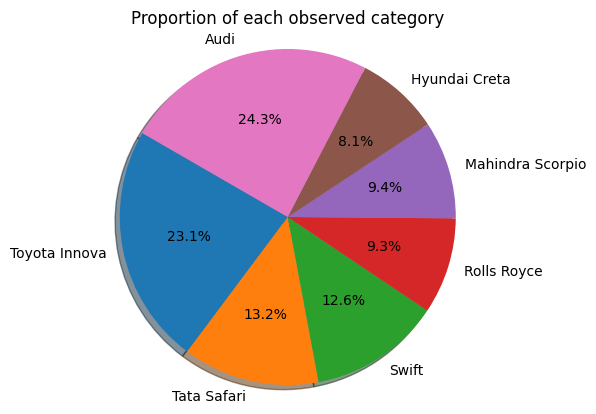

In [ ]:
# Plot a pie chart
sizes = np.bincount(train_labels)
# explode should have the same length as the number of categories (7 in this case)
explode = (0, 0, 0, 0, 0, 0, 0)  # Updated explode to have 7 elements
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

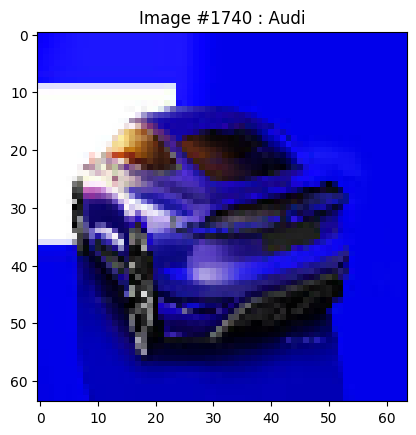

In [ ]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[train_labels[index]])
plt.show()

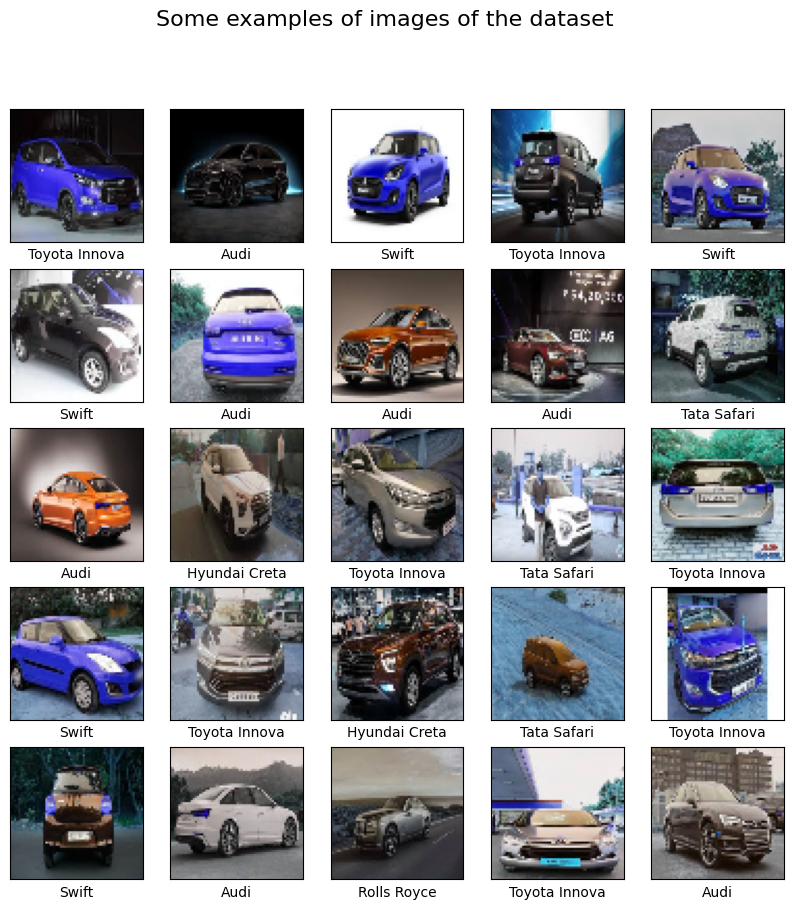

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3)), # Corrected input shape to match the data
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation=tf.nn.softmax) # Changed to 7 nodes to match the number of classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           8,071 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,463 (107.28 KB)

 Trainable params: 27,463 (107.28 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_split = 0.1)

Epoch 1/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.6667 - val_loss: 2.4168
Epoch 2/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.6637 - val_loss: 2.4499
Epoch 3/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.6726 - val_loss: 2.5271
Epoch 4/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 21s 157ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.6696 - val_loss: 2.5182
Epoch 5/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.6726 - val_loss: 2.5822
Epoch 6/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 158ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.6667 - val_loss: 2.6341
Epoch 7/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.6667 - val_loss: 2.6556
Epoch 8/20
95/95 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accu

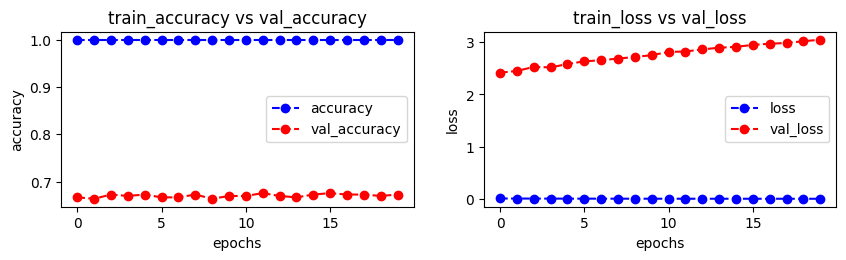

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.6623 - loss: 3.1178


In [ ]:
print(test_loss)

[2.7635657787323, 0.6740467548370361]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


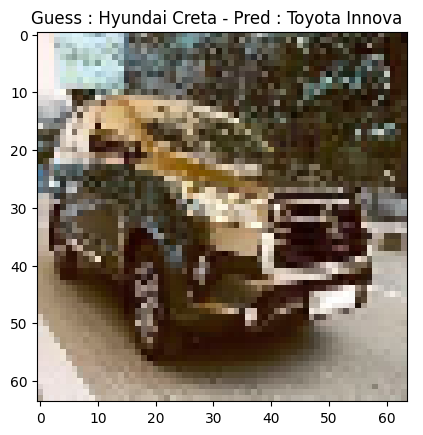

In [ ]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]]

title = 'Guess : {} - Pred : {}  '.format(pred_label , true_label )

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.title(title)
plt.show()

In [ ]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]
    fig = plt.figure(figsize=(6,6))
    fig.suptitle("Some examples of mislabeled images by the classifier:", fontsize=16)
    for i in range(8):
        plt.subplot(4,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(mislabeled_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[mislabeled_labels[i]])
    plt.show()

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


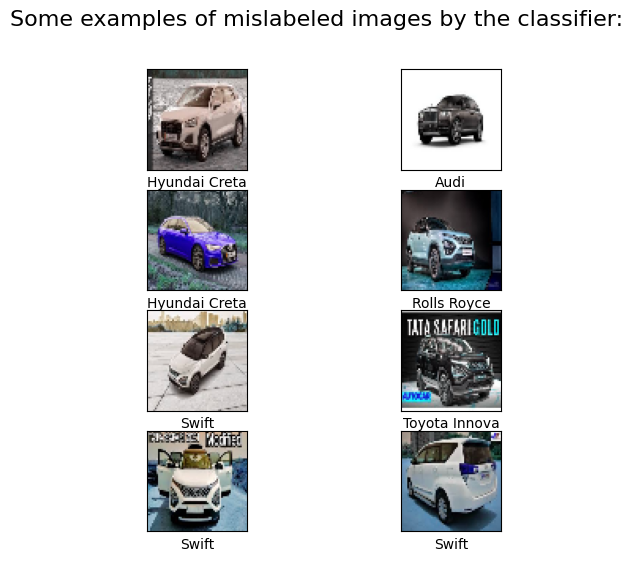

In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis = 1)
print_mislabeled_images(class_names, test_images, test_labels, pred_labels)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False, #if true all values in confusion matrix is between 0 and 1
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[141   2  18   1   5  17   6]
 [  1  86   9   1   2   1   6]
 [  8   2  80   0   2   6   4]
 [  4   4   4  17   6   4  35]
 [  8  11   3   0  40   6   7]
 [  4   5   2   2   1  48   5]
 [  6  13  13  18   5   8 136]]


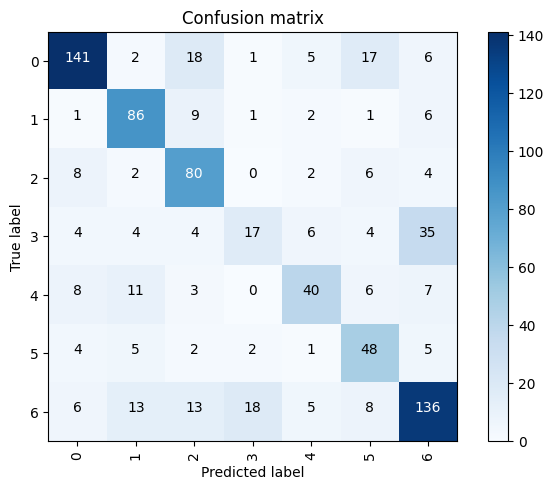

                  precision    recall  f1-score   support

            Audi       0.82      0.74      0.78       190
   Hyundai Creta       0.70      0.81      0.75       106
Mahindra Scorpio       0.62      0.78      0.69       102
     Rolls Royce       0.44      0.23      0.30        74
           Swift       0.66      0.53      0.59        75
     Tata Safari       0.53      0.72      0.61        67
   Toyota Innova       0.68      0.68      0.68       199

        accuracy                           0.67       813
       macro avg       0.64      0.64      0.63       813
    weighted avg       0.67      0.67      0.67       813



In [ ]:
import itertools
from sklearn.metrics import classification_report
cm = confusion_matrix(test_labels, pred_labels )
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=np.arange(7),
                      title='Confusion matrix')
plt.show()
print(classification_report(test_labels, pred_labels,target_names=['Audi', 'Hyundai Creta','Mahindra Scorpio','Rolls Royce','Swift','Tata Safari','Toyota Innova']))